<a href="https://colab.research.google.com/github/hosseinrezaie0/CI-T.A-Dr.Helmi/blob/main/Evolutionary%20Algorithm/Genetic/N-Queen%20Problem/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **N-Queens problem:**


The N-Queen Problem is a classic combinatorial problem in computer science and mathematics. It involves placing N queens on an N × N chessboard such that:

No two queens conflict each other.

1. Queens cannot be in the same row.

2. Queens cannot be in the same column.

3. Queens cannot be on the same diagonal.

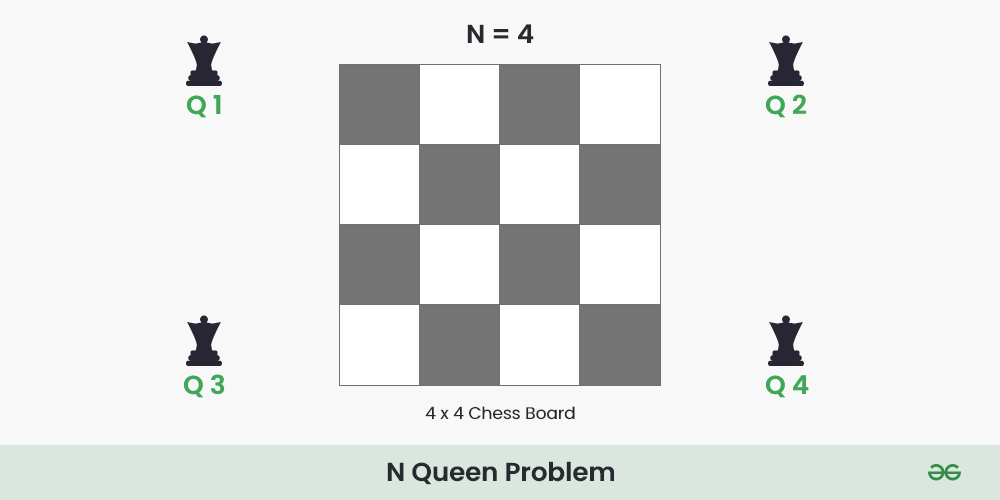

## Conflict

**Row Conflict:**

$$Q^n_{i} == Q^m _{i}$$



---


**Column Conflict:**
$$Q^n_{j} == Q^m _{j}$$


---



**Diagonal Conflict:**

$$|Q^n_{i} - Q^m_{i}| == |Q^n_{j} - Q^m_{j}|$$




## Matrix representation - Bad approach!

If we use a full
𝑁
×
𝑁
chessboard, we must store all cells, marking where queens are with 1 and empty spaces with 0.

Each chromosome has N^2 numbers. To calculate the conflict of each chromosome we need to use nested loops. A loop for row and a loop for column. So the big O of this approach is O(N * N).





```
count = 0
for i = 0 ; i < N ; ++i
  for j = 0 ;  j < N ; ++j
    if conflict == True
      count += 1
```


Another problem with this representation is that it has a huge search space. The number of solutions that we should check is $$ 2^{{N ^ 2}} $$

| N | O(N * N) | Search Space |
|----------|----------|----------|
| 4  | 16  | 65,536  |
| 10  |100  | 2^100  |
| 100  | 10000  | 2 ^ 10000  |
| 1000  | 1000000  | 2 ^  1000000 |





## Solution


Instead of using an
𝑁
×
𝑁 board, we use an array of length
𝑁
where:

The index represents the row number.

The value at that index represents the column number.

# Code

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
# Set the algorithm parameters
N =  8      # Size of the chessboard - Number of genes in each chromosome
PS = 200    # Number of chromosomes in each generation
epochs = 100
MR = 0.1    # Mutation rate
NC = 200      # Number of children of each generation

## Step 1

Initialize the population

In [ ]:
def init_population(n, ps):
  population = []
  for i in range(ps):
    chromosome = []
    for j in range(n):
      gene = np.random.randint(0, n)
      chromosome.append(gene)
    chromosome.append(None)
    population.append(chromosome)
  return population

## Step 2

Repopulation
1. Selection
2. Crossover
3. Mutation

### **Selection**

#### Random Selection

In [ ]:
def random_select(population):
  i = np.random.randint(0, len(population))
  return i

#### Roulette Wheel

$$ \mathrm{Expected\ value_{i}} = \frac{Fitness_{i}}{\mathrm{Average\ fitness}} $$



In [ ]:
def roulette_wheel_selection(population):
  population = calculate_fitness(population, N)

  average_fitness = np.sum(chromosome[-1] for chromosome in population) / len(population)
  expected_value = [chromosome[-1] / average_fitness for chromosome in population]

  T = np.sum(expected_value)
  r = np.random.uniform(0, T)

  current = 0
  for i in range(len(population)):
    current += expected_value[i]
    if r < current:
      return i

#### Rank Selection

$$ \mathrm{Expected Value_{i}} = min + (max - min)(\frac{N - rank_{i}} {N -1})$$

$$Rank_{i} = \mathrm{Index\ of\ sorted\ population} $$

In [ ]:
def rank_selection(population, min, max):
  population = calculate_fitness(population, N)
  population.sort(key=lambda x: x[-1])

  expected_value = [min + ((max - min) * (N -rank / len(population) - 1)) for rank in range(1, len(population)+1)]

  T = np.sum(expected_value)
  r = np.random.uniform(0, T)

  current = 0
  for i in range(len(population)):
    current += expected_value[i]
    if r < current:
      return i

#### Sigma Scaling Selection

$$ \mathrm{Expected\ Value_{i}} =
\begin{cases}
 1 + \frac{Fitness_{i} - \mu} {2 \sigma}  &&& \text{if}& \sigma  \neq 0 \\
 1 &&& \text{if}& \sigma = 0
 \end{cases} $$

$$ \mu = \frac{1} {N} \sum_{i=1}^N Fitness_{i}$$

$$\sigma  = \sqrt{\frac{1}{N} \sum_{i = 1}^N Fitness_{i} - \mu }$$

### **Crossover**

#### Single-Point Crossover

In [ ]:
def single_point_crossover(parent1, parent2, n, point):
  if point == 0:
    point = np.random.randint(1, n)

  child1 = parent1[:point] + parent2[point:n] + [None]
  child2 = parent2[:point] + parent1[point:n] + [None]
  return [child1, child2]

### **Mutation**

#### Swap Mutation

In [ ]:
def swap_mutation(children, n, nc, mr):
  random.shuffle(children)
  for child in children:
    if np.random.rand() < mr:
      point1 = np.random.randint(0, n)
      point2 = np.random.randint(0, n)
      child[point1], child[point2] = child[point2], child[point1]
  return children

## Step 3

Evaluate Fitness

In [ ]:
def calculate_fitness(population, n):
    length = len(population)
    for k in range(length):
        conflict = 0
        for i in range(0, n):
            for j in range(i+1, n):
                if population[k][i] == population[k][j]:
                    conflict += 1
                if abs(i - j) == abs(population[k][i] - population[k][j]):
                    conflict += 1
        population[k][-1] = conflict
    return population

## Step 4

Eliminate weak chromosomes

In [ ]:
def eliminate(population, ps):
  population.sort(key=lambda x: x[-1])
  population = population[:ps]
  return population

## Draw the chessboard

In [ ]:
def draw(solution, generation, n):
  conflict = solution[-1]
  solution = solution[:-1]
  fig, ax = plt.subplots(figsize=(5, 3))

  # Draw chessboard
  for i in range(n):
    for j in range(n):
      color = "white" if (i+j) % 2 == 0 else "gray"
      ax.add_patch(plt.Rectangle((i, j), 1, 1, facecolor=color))

  # Draw queens
  for col, row in enumerate(solution):
      plt.text(col + 0.5, n - row - 0.5, '♛', fontsize=24, ha='center', va='center', color='black')

  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_xlim(0, n)
  ax.set_ylim(0, n)
  ax.set_title(f"Generation {generation} Best Solution. conflicts: {conflict}", fontsize=12)

## Main

Generation 1: [5, 5, 1, 4, 7, 3, 0, 7, 3]
Generation 2: [3, 0, 6, 2, 5, 1, 4, 7, 1]
Generation 3: [3, 0, 6, 2, 5, 1, 4, 7, 1]
Generation 4: [3, 0, 6, 2, 5, 1, 4, 7, 1]
Generation 5: [3, 0, 6, 2, 5, 1, 4, 7, 1]
Generation 6: [3, 0, 6, 2, 5, 1, 4, 7, 1]
Generation 7: [3, 0, 6, 2, 5, 1, 4, 7, 1]
Generation 8: [3, 0, 6, 2, 5, 1, 4, 7, 1]
Generation 9: [3, 0, 6, 2, 5, 1, 4, 7, 1]
Generation 10: [3, 0, 6, 2, 5, 1, 4, 7, 1]
Generation 11: [3, 0, 6, 2, 5, 1, 4, 7, 1]
Generation 12: [3, 0, 6, 2, 5, 1, 4, 7, 1]
Generation 13: [3, 0, 6, 2, 5, 1, 4, 7, 1]
Generation 14: [3, 0, 6, 2, 5, 1, 4, 7, 1]
Generation 15: [3, 0, 6, 2, 5, 1, 4, 7, 1]
Generation 16: [3, 0, 6, 2, 5, 1, 4, 7, 1]
Generation 17: [3, 0, 6, 2, 5, 1, 4, 7, 1]
Generation 18: [3, 0, 6, 2, 5, 1, 4, 7, 1]
Generation 19: [3, 0, 6, 2, 5, 1, 4, 7, 1]
Generation 20: [2, 5, 7, 0, 4, 6, 1, 3, 0]


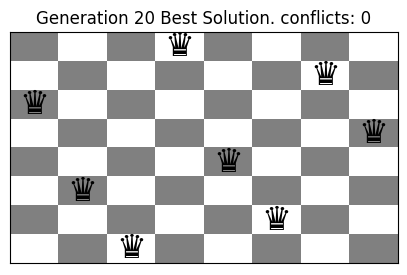

In [ ]:
current_population = init_population(N, PS)

for i in range(epochs):
  for j in range(NC//2):
    parent1 = rank_selection(current_population, 1, 2)
    parent2 = rank_selection(current_population,1,2)
    children = single_point_crossover(current_population[parent1], current_population[parent2], N, 0)
    children = swap_mutation(children, N, NC, MR)
    for child in children:
      current_population.append(child)
  current_population = calculate_fitness(current_population, N)
  current_population = eliminate(current_population, PS)
  print(f"Generation {i+1}: {current_population[0]}")
  if current_population[0][-1] == 0:
    draw(current_population[0], i+1, N)
    break